##   READ ME:
The purpose of this project is to understand what customers want from a used vehicle.
This dataset from kaggle provided me nearly with half a million data entries of past purchases of used vehicles. 
From here I need to determine what features from these sales where most important in making the sale and driving prices up or down.
Finally we report our findings to our client (used car dealership), so they may improve their future sales and/or remove inventory that may not sale well.


In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.linalg import svd
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [ ]:
!pip install category_encoders
import category_encoders as ce
!pip install -U kaleido

In [ ]:
!pip install plotly==5.3.1

# What drives the price of a car?

## Business Understanding

From a ***buisness perspective*** I need to identify what variables are influential to used car prices.

From a ***data task*** perspective using the provided data, I need to find key features that optimize my model in order to make useful predictions.

 *                                                             *

# Data Understanding
Getting familiar with the data. I wrote some steps that i use to  get to know the dataset and identify any quality issues within.

I take my time to get to know the dataset and explore what information it contains and how this could be used to inform my business understanding.

*                                                             *

#Getting to know the dataset

First we need to upload the dataset in python

Next we need to inspect our dataset 

The first thing i check is the integrity of the columns

The next thing i check are the NA's in the dataset

From here i can remove columns that are missing too many entries

columns that are missing a few values can just drop those rows

Finally i display the dataframe and check for inconsistancies and determine if index needs to be reset

In [22]:
df = pd.read_csv('/content/sample_data/vehicles.csv')
    # reads CSV file and makes a dataframe

In [7]:
df.info()
# Displays columns, NA count and data_type
# I determine which columns need fixing or removing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [46]:
df
# Viewing of the dataset

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


### Data Exploration and Prep

After our initial exploration and fine tuning of my business understanding, I construct my final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

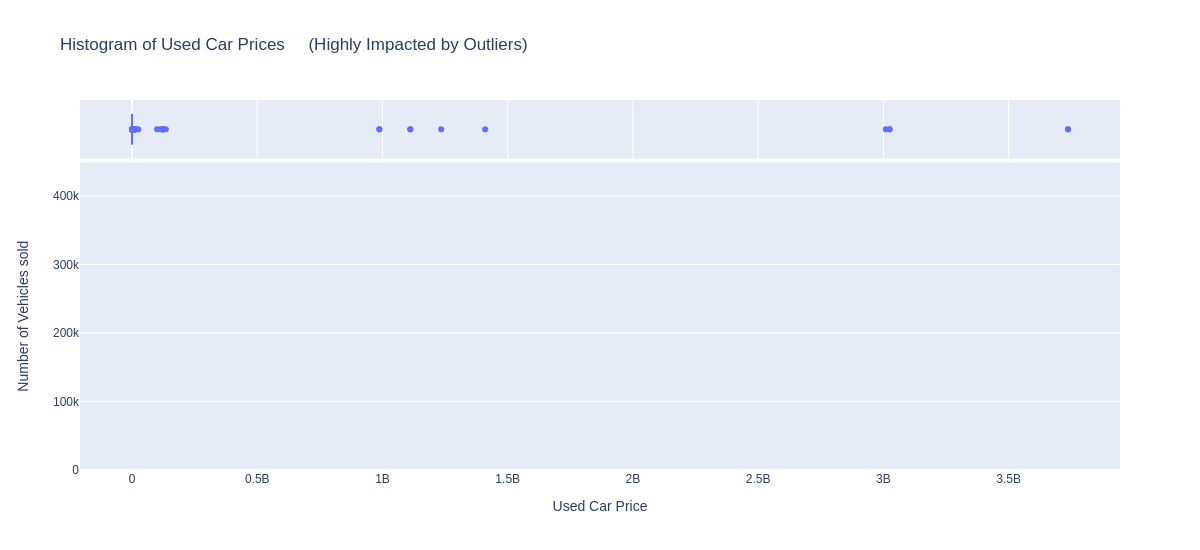

In [23]:
# Spread of Price data
fig = px.histogram(df, x ='price',marginal = 'box',title='Histogram of Used Car Prices     (Highly Impacted by Outliers)')
fig.update_layout(xaxis_title="Used Car Price",
                yaxis_title="Number of Vehicles sold",
                autosize=False,
                width=1200,
                height=550)
fig.show("png")
# data is highly impacted by outliers

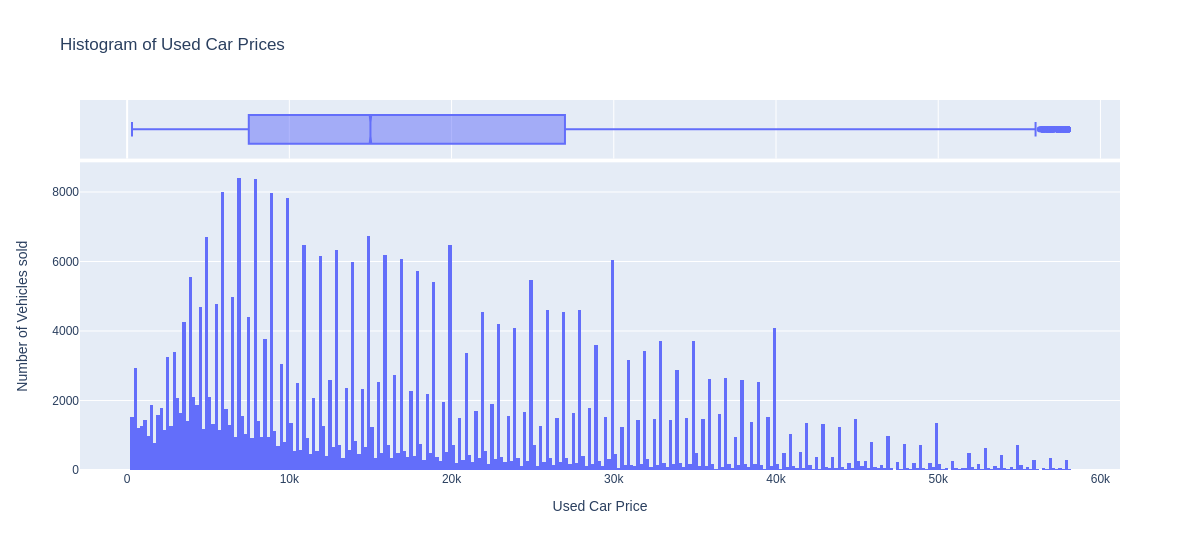

In [24]:
# Removing Price outliers
df.drop(df[df['price'] == 0].index, inplace = True)   # dropping all free used cars
df.drop(df[df['price'] > 250000].index, inplace = True) # dropping extremely large prices

# Outliers 
q1 = df.price.describe()[4] # First quartile 
q3 = df.price.describe()[6] # Third quartile
IQR = q3 - q1
LowLimit = q1 - (1.5*IQR)   # since this Value is negative, I will set it to $300
LowLimit = 300
HighLimit = round(q3 + (1.5*IQR),-3)  # this is my maximum cut off point for price rounded to the nearest thousand

df.drop(df[df['price'] > HighLimit].index, inplace = True)      #
df.drop(df[df['price'] < LowLimit].index, inplace = True)       # removes outliers
fig = px.histogram(df, x ='price',marginal = 'box',title='Histogram of Used Car Prices')
fig.update_layout(xaxis_title="Used Car Price",
                yaxis_title="Number of Vehicles sold",
                autosize=False,
                width=1200,
                height=550)
fig.show("png")

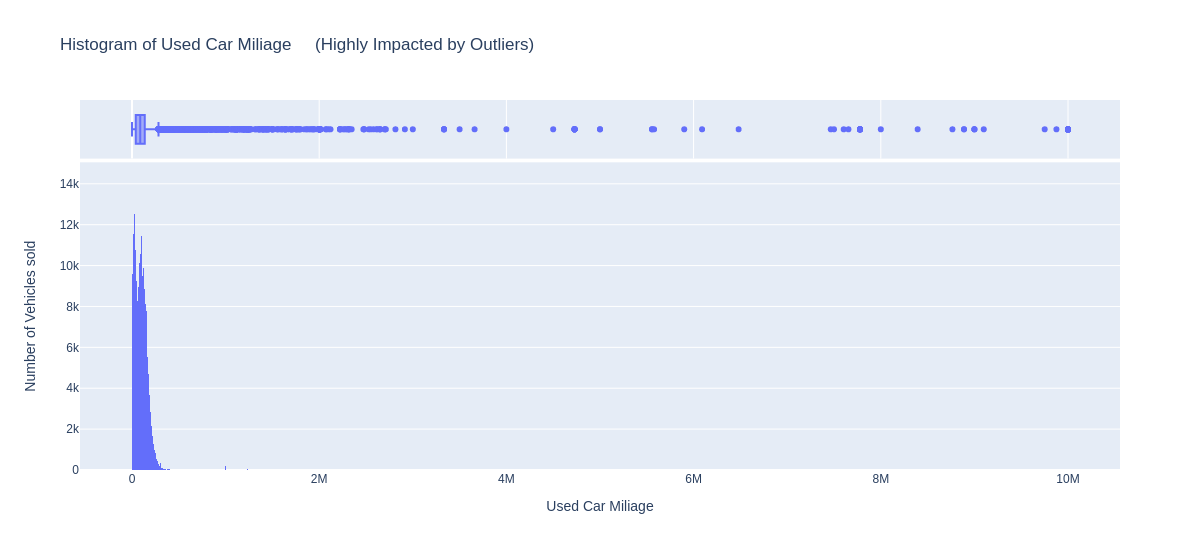

In [25]:
# Spread of odometer data
fig = px.histogram(df, x ='odometer',marginal = 'box',title='Histogram of Used Car Miliage     (Highly Impacted by Outliers)')
fig.update_layout(xaxis_title="Used Car Miliage",
                 yaxis_title="Number of Vehicles sold",
                 autosize=False,
                 width=1200,
                 height=550)
fig.show("png")

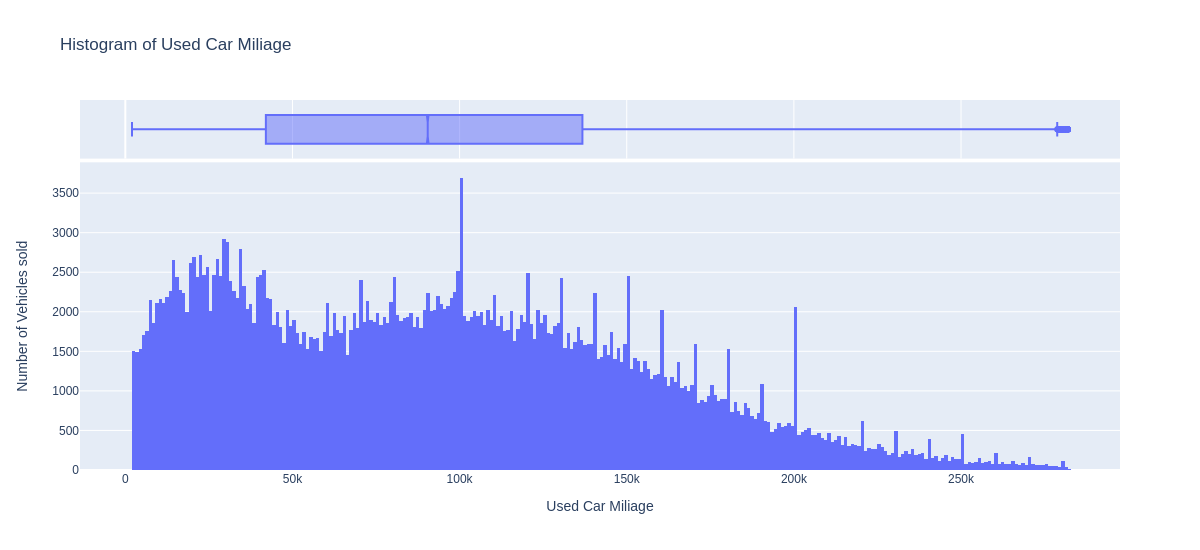

In [26]:
# Similarly we remove the outliers from the odometer column
df.drop(df[df['odometer'] > 500000].index, inplace = True)
df.drop(df[df['odometer'] == 0].index, inplace = True)

# Outliers 
q1 = df.odometer.describe()[4]      # grabs first and third quartile
q3 = df.odometer.describe()[6]
IQR = q3 - q1
LowLimit = q1 - (1.5*IQR)   # since this Value is negative, I will set it to 2000 miles
LowLimit = 2000
HighLimit = round(q3 + (1.5*IQR),-3)  # this is my maximum cut off point for price rounded to the nearest thousand

df.drop(df[df['odometer'] > HighLimit].index, inplace = True)     # removes outliers
df.drop(df[df['odometer'] < LowLimit].index, inplace = True)
fig = px.histogram(df, x ='odometer',marginal = 'box',title='Histogram of Used Car Miliage') 
fig.update_layout(xaxis_title="Used Car Miliage", 
                 yaxis_title="Number of Vehicles sold",
                 autosize=False,
                 width=1200,
                 height=550)
fig.show("png")

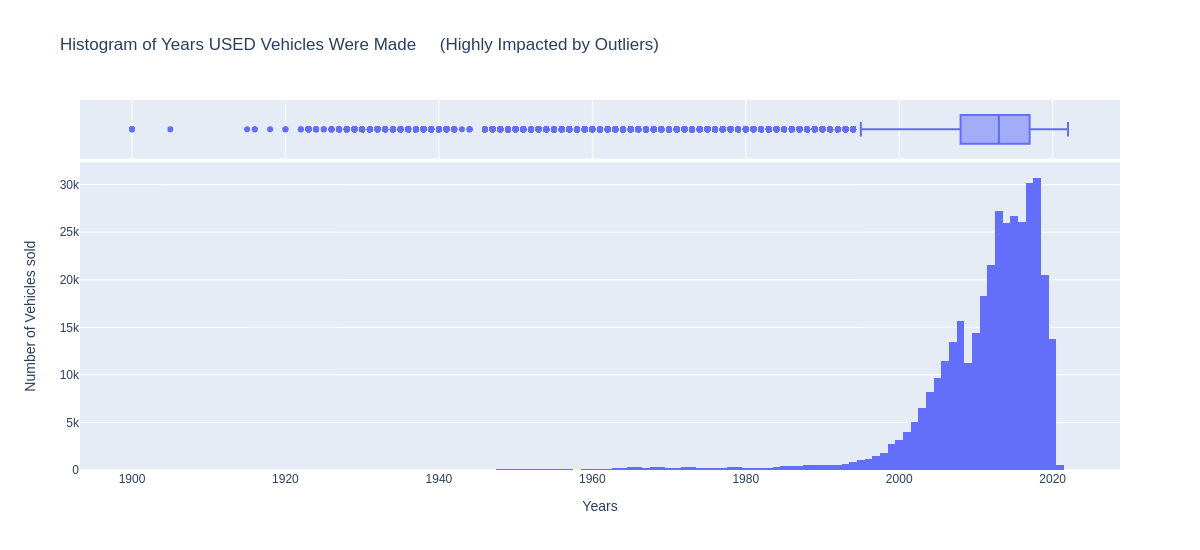

In [27]:
# Sread of year data
fig = px.histogram(df, 
                  x ='year',
                  marginal = 'box',
                  title='Histogram of Years USED Vehicles Were Made     (Highly Impacted by Outliers)') # display
fig.update_layout(xaxis_title="Years", 
                 yaxis_title="Number of Vehicles sold",
                 autosize=False,
                 width=1200,
                 height=550)
fig.show("png")

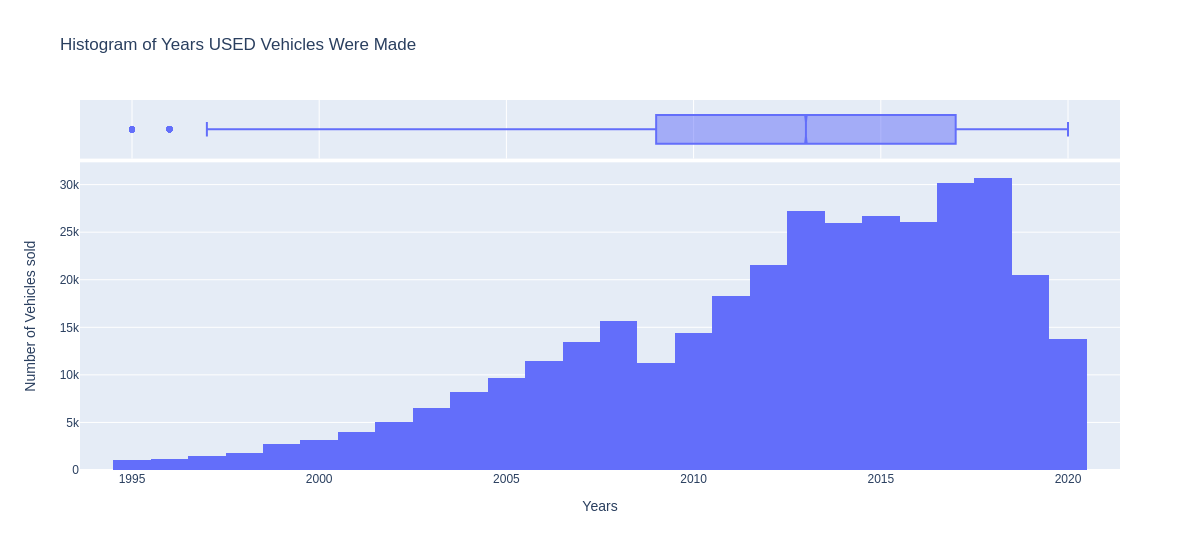

In [28]:
# Lastly we remove the outliers from the year column
df.drop(df[df['year'] < 1960].index, inplace = True) # No too old cars
df.drop(df[df['year'] == 2021].index, inplace = True) # no new cars

# Outliers 
q1 = df.year.describe()[4]    # grabs first and third quatile
q3 = df.year.describe()[6]
IQR = q3 - q1
LowLimit = q1 - (1.5*IQR)   

HighLimit = q3 + (1.5*IQR)  # Since the high limit is 2030, i will assign it 2020
HighLimit = 2020

df.drop(df[df['year'] > HighLimit].index, inplace = True)   # removes outliers
df.drop(df[df['year'] < LowLimit].index, inplace = True)
fig = px.histogram(df, x ='year',marginal = 'box',title='Histogram of Years USED Vehicles Were Made')
fig.update_layout(xaxis_title="Years", 
                 yaxis_title="Number of Vehicles sold",
                 autosize=False,
                 width=1200,
                 height=550)
fig.show("png")

### California Sales

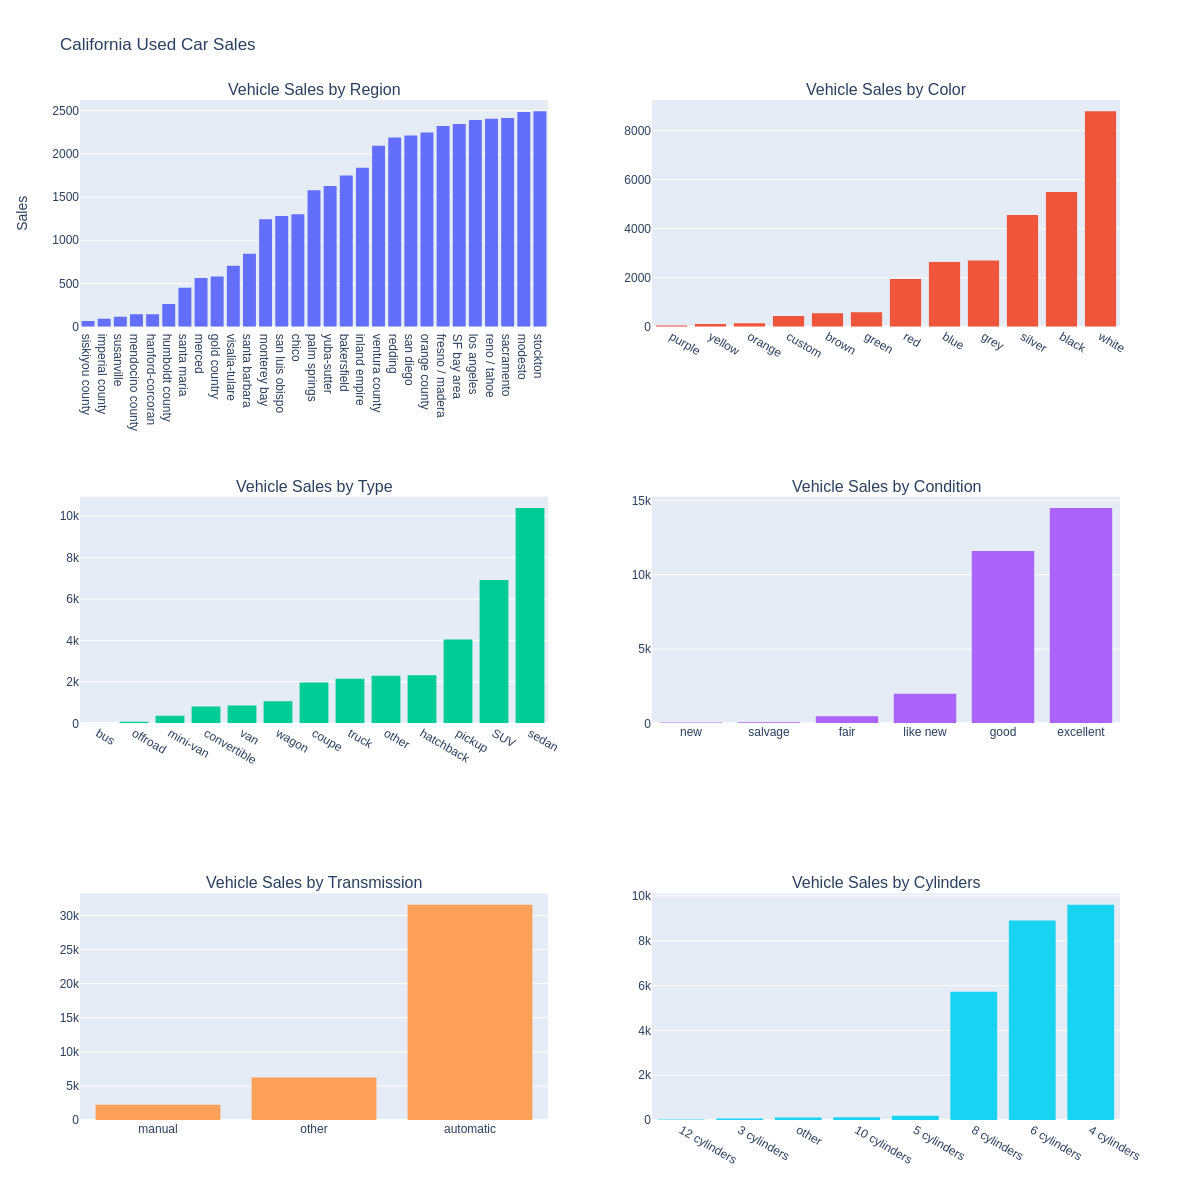

In [88]:
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=("Vehicle Sales by Region",
                                    "Vehicle Sales by Color", 
                                    "Vehicle Sales by Type", 
                                    "Vehicle Sales by Condition",
                                    "Vehicle Sales by Transmission",
                                    "Vehicle Sales by Cylinders"))
df_california = df[df['state']=='ca']

fig.add_trace(go.Histogram(x = df_california.region), row=1, col=1)
fig.update_xaxes(categoryorder = 'total ascending')
fig.update_layout(yaxis_title="Sales")

fig.add_trace(go.Histogram(x = df_california.paint_color),row=1, col=2)

fig.add_trace(go.Histogram(x = df_california.type),row=2, col=1)

fig.add_trace(go.Histogram(x = df_california.condition),row=2, col=2)

fig.add_trace(go.Histogram(x = df_california.transmission),row=3, col=1)

fig.add_trace(go.Histogram(x = df_california.cylinders),row=3, col=2)

fig.update_layout(height=1200, width=1200, autosize=False,
                  title_text="California Used Car Sales", showlegend=False)
fig.show("png")

In [ ]:
# ************** FUTURE WORK ***************
# For the missing values, we will use an iterative imputer       

# cannot get iterative Imputer to work for categorical Values

# imputer = IterativeImputer(estimator=LinearRegression(), n_nearest_features=None, imputation_order='ascending')
# imputer.fit(df)
# Xtrans = imputer.transform(df)


### Dataset Cleaning

In [ ]:
df = df.drop(columns=['id', 'condition','cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color'])
# Remove columns: id, condition, cylinder, VIN, Drive, size, type, paint_color   
        # Too many missing values.   id feature does not provide any information so I removed it       
df = df.dropna(axis=0)
# Drop rows: year, manufacturer, model, fuel, odometer, title_status, transmission
        # Missing a few values no real usefull way to implement 

y = df['price'] # saves the price column

###Data Transformation

In [ ]:
# Take the NON-Numerical features and Target Encode so that the size of dataset does not increase
enc = ce.TargetEncoder(cols=['region','manufacturer', 'model','fuel','title_status', 'transmission','state' ], min_samples_leaf=20, smoothing=10).fit(df, y)
Xt = enc.transform(df)
Xt    # new datafram with no object_type features

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
27,27856.672390,33590,2014.0,23609.380346,35224.934484,16885.765053,57923.0,18571.169338,28458.427712,20925.752611
28,27856.672390,22590,2010.0,19204.844337,23500.434560,16885.765053,71229.0,18571.169338,28458.427712,20925.752611
29,27856.672390,39590,2020.0,19204.844337,34566.987603,16885.765053,19160.0,18571.169338,28458.427712,20925.752611
30,27856.672390,30990,2017.0,17241.617095,34749.481707,16885.765053,41124.0,18571.169338,28458.427712,20925.752611
31,27856.672390,15000,2013.0,19969.000747,21052.462916,16885.765053,128000.0,18571.169338,16453.878982,20925.752611
...,...,...,...,...,...,...,...,...,...,...
426875,21856.765086,23590,2019.0,13077.067229,21448.862270,16885.765053,32226.0,18571.169338,28458.427712,21856.765086
426876,21856.765086,30590,2020.0,17967.426593,29465.483466,16885.765053,12029.0,18571.169338,28458.427712,21856.765086
426877,21856.765086,34990,2020.0,20717.480572,34402.394366,30556.663945,4174.0,18571.169338,28458.427712,21856.765086
426878,21856.765086,28990,2018.0,20606.515114,24360.332658,16885.765053,30112.0,18571.169338,28458.427712,21856.765086


In [ ]:
# Now we Normalize columns
Xt_scaled = scale(Xt)
Xt_norm = pd.DataFrame(Xt_scaled, columns=Xt.columns)
Xt_norm.describe()[1:3].round(2)      # mean 0 and std 1

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
0,2.816933,1.211525,0.286538,1.164524,1.979542,-0.377507,-0.610399,0.166396,2.200261,1.245388
1,2.816933,0.336622,-0.453902,0.187833,0.606675,-0.377507,-0.388065,0.166396,2.200261,1.245388
2,2.816933,1.688746,1.397198,0.187833,1.902500,-0.377507,-1.258103,0.166396,2.200261,1.245388
3,2.816933,1.004730,0.841868,-0.247506,1.923869,-0.377507,-0.891100,0.166396,2.200261,1.245388
4,2.816933,-0.267061,0.101428,0.357282,0.320033,-0.377507,0.560541,0.166396,-0.414716,1.245388
...,...,...,...,...,...,...,...,...,...,...
328448,1.037680,0.416159,1.212088,-1.170981,0.366449,-0.377507,-1.039779,0.166396,2.200261,1.696889
328449,1.037680,0.972915,1.397198,-0.086560,1.305146,-0.377507,-1.377258,0.166396,2.200261,1.696889
328450,1.037680,1.322877,1.397198,0.523255,1.883227,3.128638,-1.508510,0.166396,2.200261,1.696889
328451,1.037680,0.845657,1.026978,0.498649,0.707364,-0.377507,-1.075103,0.166396,2.200261,1.696889


In [ ]:
# Perform PCA / SVD to reduce number of features used
U, s, Vt = svd(Xt_norm, full_matrices=False)
Sigma = np.diag(s)
V = Vt.T                            # using PCA will not help in figuring out which features are driving sales.
                                    # but i decided to included it, for future use.                                             

In [ ]:
# Project data using 5 principal components
r = 5        # Number of principal components
Ur = U[:,:r]
Sigmar = Sigma[:r,:r]
Xrr = pd.DataFrame(Ur @ Sigmar)
print(Xrr)

               0         1         2         3         4
0      -3.506983  1.936689 -0.143484 -0.202088  0.059124
1      -1.893794  2.175395  0.478614 -0.417843 -0.803096
2      -4.173758  1.618170  1.080740 -0.308033 -0.248014
3      -3.393294  1.775218  0.980918 -0.379450 -0.688659
4      -0.495834  2.851457  0.021606 -0.247996  0.296448
...          ...       ...       ...       ...       ...
328448 -2.107872  0.967294  2.091651 -0.512814 -1.173173
328449 -3.230059  0.831646  1.399127 -0.312080 -0.376468
328450 -4.552670  0.720937 -0.746421  0.239345 -2.264988
328451 -2.778661  1.000856  1.002794 -0.277624 -0.161785
328452 -3.059722  0.932193  1.050663 -0.261458 -0.102039

[328453 rows x 5 columns]


Text(0.5, 1.0, 'Percent Explained by SVD using 7 Principal Components: 0.914')

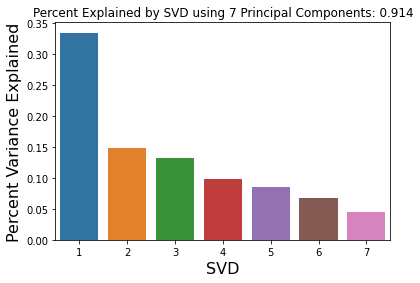

In [ ]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
p = list(range(1,len(var_explained)+1))
PC = 7
px = p[0:PC]
py = var_explained[0:PC]

sns.barplot(x=px,y=py)
plt.xlabel('SVD', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.title('Percent Explained by SVD using '+str(PC)+' Principal Components: '+str(round(py.sum(),5)))

# Modeling


In [ ]:
y = Xt_norm['price']                # Define Training Set
X = Xt_norm.drop(columns=['price'])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)    # Setup validation

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]   # hyperparameter for Gridsearch
hyperparameters = dict(alpha=alpha)

In [ ]:
lasso = Lasso()			# Define model
results_lasso = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)	# Scores model before gridsearch

clf_lasso = GridSearchCV(lasso, hyperparameters, cv=kfold, verbose=0,n_jobs=-1)		# applies gridsearch
best_model = clf_lasso.fit(X, y)

lasso = Lasso(alpha = best_model.best_estimator_.get_params()['alpha'])				# Defines new model with optimum hyperparameters
results_lasso_2 = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)		# scores model with hyperparameters
lasso.fit(X,y)					# we fit it to get coefficients / feature importance

Lasso(alpha=1e-05)

In [ ]:
ridge = Ridge()     # Define model
results_ridge = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)	# Scores model before gridsearch

clf_ridge = GridSearchCV(ridge, hyperparameters, cv=kfold, verbose=0,n_jobs=-1)		# applies gridsearch
best_model = clf_ridge.fit(X, y)

ridge = Ridge(alpha = best_model.best_estimator_.get_params()['alpha'])			# Defines new model with optimum hyperparameters
results_ridge_2 = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)		# scores model with hyperparameters
ridge.fit(X,y)					# we fit it to get coefficients / feature importance

Ridge(alpha=10.0)

In [ ]:
elastic = ElasticNet()  # Define model
results_elastic = cross_val_score(elastic, X, y, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)	# Scores model before gridsearch

clf_elastic = GridSearchCV(elastic, hyperparameters, cv=kfold, verbose=0,n_jobs=-1)		# applies gridsearch
best_model = clf_elastic.fit(X, y)

elastic = ElasticNet(alpha = best_model.best_estimator_.get_params()['alpha'])			# Defines new model with optimum hyperparameters
results_elastic_2 = cross_val_score(elastic, X, y, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)		# scores model with hyperparameters
elastic.fit(X,y)					# we fit it to get coefficients / feature importance

ElasticNet(alpha=1e-05)

# Evaluation
 

*****LASSO Regression*****

*****BEFORE GRID_SEARCH*****
Cross_Val_Accuracy: Final mean:-83.362%, Final standard deviation:(0.138%)
Cross_Val_Accuracies from each of the 10 folds using kfold: [-0.8320766  -0.83325549 -0.83587088 -0.83397535 -0.83216647 -0.83274621
 -0.83357496 -0.83593048 -0.83451013 -0.83207169]
Cross_Val_Variance of kfold accuracies: 1.9113846917951197e-06


*****AFTER GRID_SEARCH*****
Best Parameters {'alpha': 0.0}
Best Alpha: 1e-05
Cross_Val_Accuracy: Final mean:-36.184%, Final standard deviation:(0.226%)
Cross_Val_Accuracies from each of the 10 folds using kfold: [-0.36590037 -0.36201911 -0.36170793 -0.36047703 -0.36174183 -0.36417784
 -0.36453897 -0.35912745 -0.35895877 -0.35978293]
Cross_Val_Variance of kfold accuracies: 5.104427754379583e-06


region:		 Score: 0.05080
year:		 Score: 0.29042
manufacturer:		 Score: 0.06059
model:		 Score: 0.52528
fuel:		 Score: 0.10137
odometer:		 Score: -0.23879
title_status:		 Score: 0.05324
transmission:		 Score: -0.12379
stat

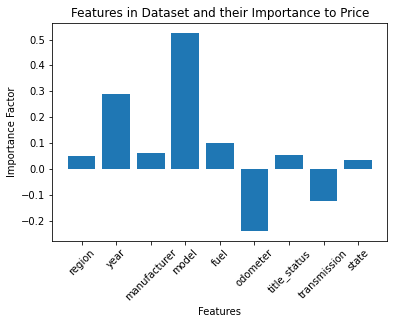

In [ ]:
print('*****LASSO Regression*****')       # display model info
print('') 
print('*****BEFORE GRID_SEARCH*****')
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_lasso.mean()*100.0, results_lasso.std()*100.0))
print('Cross_Val_Accuracies from each of the 10 folds using kfold:',results_lasso)
print("Cross_Val_Variance of kfold accuracies:",results_lasso.var())
print('') 
print('') 
print('*****AFTER GRID_SEARCH*****')
print('Best Parameters',clf_lasso.best_params_)
print('Best Alpha:', best_model.best_estimator_.get_params()['alpha'])
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_lasso_2.mean()*100.0, results_lasso_2.std()*100.0))
print('Cross_Val_Accuracies from each of the 10 folds using kfold:',results_lasso_2)
print("Cross_Val_Variance of kfold accuracies:",results_lasso_2.var())
print('') 
print('')
# summarize feature importance
importance_Lasso = lasso.coef_
for i,v in enumerate(importance_Lasso):
	print(str(X.columns[i])+':\t\t Score: %.5f' % (v))

pyplot.bar(X.columns, importance_Lasso)
pyplot.title('Features in Dataset and their Importance to Price')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Factor')
pyplot.xticks(rotation = 45)
pyplot.show()

*****RIDGE Regression*****

*****BEFORE GRID_SEARCH*****
Cross_Val_Accuracy: Final mean:-36.185%, Final standard deviation:(0.154%)
Cross_Val_Accuracies from each of the 10 folds using kfold: [-0.36391611 -0.36306355 -0.36415669 -0.35942587 -0.35944749 -0.3609881
 -0.3621199  -0.36204701 -0.36133679 -0.3619682 ]
Cross_Val_Variance of kfold accuracies: 2.3842560570926166e-06


*****AFTER GRID_SEARCH*****
Best Parameters {'alpha': 10.0}
Best Alpha: 1e-05
Cross_Val_Accuracy: Final mean:-36.185%, Final standard deviation:(0.156%)
Cross_Val_Accuracies from each of the 10 folds using kfold: [-0.36224971 -0.36002826 -0.3618122  -0.36171606 -0.36024456 -0.36330664
 -0.36471964 -0.363048   -0.35929165 -0.36203504]
Cross_Val_Variance of kfold accuracies: 2.444635573473564e-06


region:		 Score: 0.05081
year:		 Score: 0.29041
manufacturer:		 Score: 0.06060
model:		 Score: 0.52525
fuel:		 Score: 0.10137
odometer:		 Score: -0.23878
title_status:		 Score: 0.05324
transmission:		 Score: -0.12377
stat

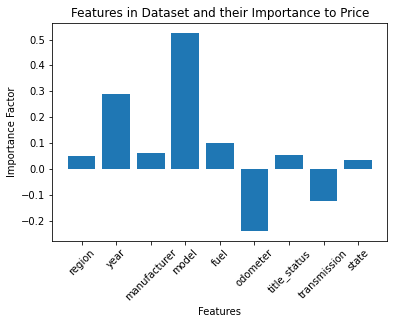

In [ ]:
print('*****RIDGE Regression*****')     # display model info
print('') 
print('*****BEFORE GRID_SEARCH*****')
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_ridge.mean()*100.0, results_ridge.std()*100.0))
print('Cross_Val_Accuracies from each of the 10 folds using kfold:',results_ridge)
print("Cross_Val_Variance of kfold accuracies:",results_ridge.var())
print('') 
print('') 
print('*****AFTER GRID_SEARCH*****')
print('Best Parameters',clf_ridge.best_params_)
print('Best Alpha:', best_model.best_estimator_.get_params()['alpha'])
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_ridge_2.mean()*100.0, results_ridge_2.std()*100.0))
print('Cross_Val_Accuracies from each of the 10 folds using kfold:',results_ridge_2)
print("Cross_Val_Variance of kfold accuracies:",results_ridge_2.var())
print('') 
print('')

# Displays feature importance
importance_Ridge = ridge.coef_
for i,v in enumerate(importance_Ridge):
	print(str(X.columns[i])+':\t\t Score: %.5f' % (v))
 
pyplot.bar(X.columns, importance_Ridge)
pyplot.title('Features in Dataset and their Importance to Price')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Factor')
pyplot.xticks(rotation = 45)
pyplot.show()

*****ElasticNet Regression*****

*****BEFORE GRID_SEARCH*****
Cross_Val_Accuracy: Final mean:-71.693%, Final standard deviation:(0.309%)
Cross_Val_Accuracies from each of the 10 folds using kfold: [-0.71806069 -0.71302516 -0.72147108 -0.71737863 -0.71038348 -0.71636405
 -0.71611441 -0.7197863  -0.7172841  -0.71938623]
Cross_Val_Variance of kfold accuracies: 9.55079963351588e-06


*****AFTER GRID_SEARCH*****
Best Parameters {'alpha': 1e-05}
Best Alpha: 1e-05
Cross_Val_Accuracy: Final mean:-36.184%, Final standard deviation:(0.192%)
Cross_Val_Accuracies from each of the 10 folds using kfold: [-0.36240258 -0.36360843 -0.35953766 -0.36328286 -0.36381689 -0.35979168
 -0.36337943 -0.35800931 -0.362868   -0.36174631]
Cross_Val_Variance of kfold accuracies: 3.703962139083627e-06


region:		 Score: 0.05080
year:		 Score: 0.29041
manufacturer:		 Score: 0.06059
model:		 Score: 0.52527
fuel:		 Score: 0.10137
odometer:		 Score: -0.23878
title_status:		 Score: 0.05324
transmission:		 Score: -0.12377

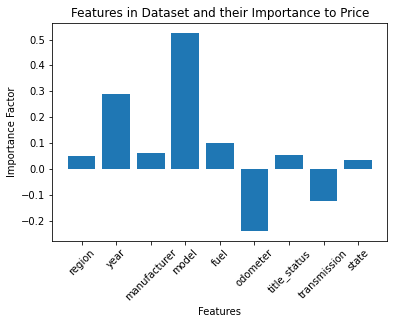

In [ ]:
print('*****ElasticNet Regression*****')      # display model info
print('') 
print('*****BEFORE GRID_SEARCH*****')
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_elastic.mean()*100.0, results_elastic.std()*100.0))
print('Cross_Val_Accuracies from each of the 10 folds using kfold:',results_elastic)
print("Cross_Val_Variance of kfold accuracies:",results_elastic.var())
print('') 
print('') 
print('*****AFTER GRID_SEARCH*****')
print('Best Parameters',clf_elastic.best_params_)
print('Best Alpha:', best_model.best_estimator_.get_params()['alpha'])
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_elastic_2.mean()*100.0, results_elastic_2.std()*100.0))
print('Cross_Val_Accuracies from each of the 10 folds using kfold:',results_elastic_2)
print("Cross_Val_Variance of kfold accuracies:",results_elastic_2.var())
print('') 
print('')

# Displays feature importance
importance_Elastic = elastic.coef_
for i,v in enumerate(importance_Elastic):
	print(str(X.columns[i])+':\t\t Score: %.5f' % (v))

pyplot.bar(X.columns, importance_Elastic)
pyplot.title('Features in Dataset and their Importance to Price')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Factor')
pyplot.xticks(rotation = 45)
pyplot.show()




---


*   **All three models agree that the price is highly associated with features 1 and 3. These features are YEAR and MODEL and help drive the price up.**

*   **Similarly there are two features that help drive the price down. These features slightly influential. Feauture 5 and 7 which are Odometer and transmission.**



---





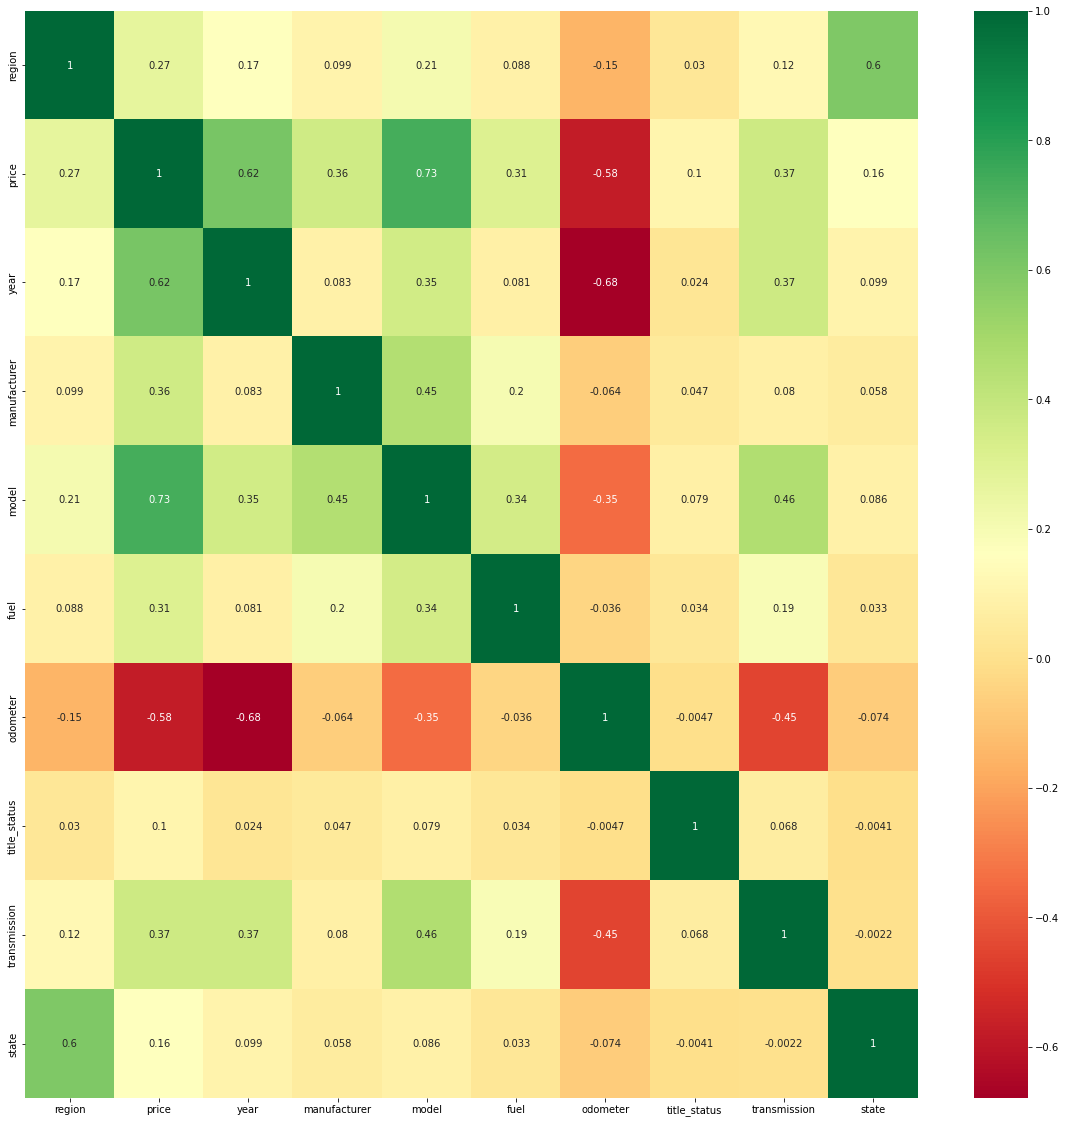

In [ ]:
# HeatMap of correlations of each feature in dataset
corrmat = Xt_norm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Xt_norm[top_corr_features].corr(),annot=True,cmap="RdYlGn")



---


**With out running any models. Our heatmap shows similar finidings.
Where YEAR and MODEL are highly correlates with price and ODOMETER negatively impacts price.**


---



In [ ]:
# since all the other data related to the models are very similar.
# lets look where they differ more.
print('*****LASSO Regression*****') 
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_lasso_2.mean()*100.0, results_lasso_2.std()*100.0))
print("Cross_Val_Variance of kfold accuracies:",results_lasso_2.var())
print('') 
print('')
print('*****RIDGE Regression*****')
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_ridge_2.mean()*100.0, results_ridge_2.std()*100.0))
print("Cross_Val_Variance of kfold accuracies:",results_ridge_2.var())
print('') 
print('')
print('*****ElasticNet Regression*****')  
print("Cross_Val_Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_elastic_2.mean()*100.0, results_elastic_2.std()*100.0))
print("Cross_Val_Variance of kfold accuracies:",results_elastic_2.var())

*****LASSO Regression*****
Cross_Val_Accuracy: Final mean:-36.184%, Final standard deviation:(0.226%)
Cross_Val_Variance of kfold accuracies: 5.104427754379583e-06


*****RIDGE Regression*****
Cross_Val_Accuracy: Final mean:-36.185%, Final standard deviation:(0.156%)
Cross_Val_Variance of kfold accuracies: 2.444635573473564e-06


*****ElasticNet Regression*****
Cross_Val_Accuracy: Final mean:-36.184%, Final standard deviation:(0.192%)
Cross_Val_Variance of kfold accuracies: 3.703962139083627e-06




---


**We can see that the Ridge Regression has sligthly less loss and slightly less deviation. I believe Ridge Regression is the best model for this dataset**


---



# Deployment

#Summary
A quick summary is that the data provided implies that people really care about the model and year of a used vehicle. These two features highly influence the price of a used car. On the other hand, the price was negatively affect by ODOMETER miliage and what type of TRANSMISSION it had.

In order to clean the dataset, we had to calculate and remove outliers from each numerical feature. Next was the problem of missing values. Some features had very little data and other had most of it. We had two choices, either remove the affected column/feature or find a way to insert a value for the missing data. I tried to insert values for the missing data but i could not get it to work so i will be working on it in the future. I decided for now to remove features that were missing too many values. From here, there were features that were missing some data. I removed the missing entries by removing those rows of data.

In order to create a good model, it is neccesary to normalize the dataset. 

I used PCA to determine how many features we actually need. Since there are some features that contribute very little to the final price, it was possible to further reduce the size of the dataset.

*                                                             *

# Findings
I separated the price feature so we can model all the other features against the price. I used 3 different kinds of models to validate my findings. All three models agreed that the price was influenced by the model and year of the car. So i decided to find out which of the three models performed the best in terms of accuracy. Here i have a model that uses Ridge Regression. 

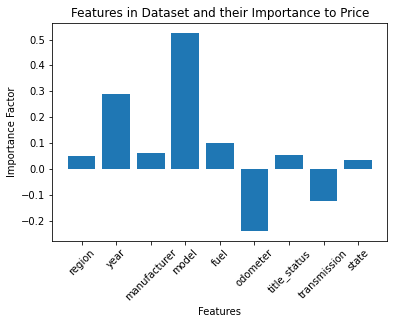

In [ ]:
# I separated the price feature so we can model all the other features against
# the price. I used 3 different kinds of models to validate my findings. All three 
# models agreed that the price was influenced by the model and year of the car.
# So i decided to find out which of the three models performed the best in terms 
# of accuracy. Here i have a model that uses Ridge Regression.  
pyplot.bar(X.columns, importance_Ridge)
pyplot.title('Features in Dataset and their Importance to Price')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Factor')
pyplot.xticks(rotation = 45)
pyplot.show()

Here we can visually see which features impact the price in the dataset. The top 4 features are YEAR, MODEL, ODOMETER, and TRANSMISSION. According to this dataset, these are the main factors people are considering when purchasing a used vehicle.